# 1. Import Library

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料預處理

In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
x_Train.shape

(60000, 28, 28)

In [5]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [6]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(128, activation='relu'))

In [16]:
model.add(Dropout(0.5))

In [17]:
model.add(Dense(10,activation='softmax'))

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# 訓練模型

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [20]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
93s - loss: 0.4877 - acc: 0.8477 - val_loss: 0.0966 - val_acc: 0.9723
Epoch 2/20
93s - loss: 0.1414 - acc: 0.9589 - val_loss: 0.0629 - val_acc: 0.9805
Epoch 3/20
105s - loss: 0.1029 - acc: 0.9692 - val_loss: 0.0510 - val_acc: 0.9841
Epoch 4/20
111s - loss: 0.0849 - acc: 0.9753 - val_loss: 0.0456 - val_acc: 0.9863
Epoch 5/20
92s - loss: 0.0723 - acc: 0.9780 - val_loss: 0.0399 - val_acc: 0.9873
Epoch 6/20
135s - loss: 0.0646 - acc: 0.9811 - val_loss: 0.0385 - val_acc: 0.9888
Epoch 7/20
145s - loss: 0.0570 - acc: 0.9830 - val_loss: 0.0412 - val_acc: 0.9882
Epoch 8/20
127s - loss: 0.0513 - acc: 0.9846 - val_loss: 0.0333 - val_acc: 0.9900
Epoch 9/20
100s - loss: 0.0458 - acc: 0.9861 - val_loss: 0.0338 - val_acc: 0.9898
Epoch 10/20
101s - loss: 0.0428 - acc: 0.9869 - val_loss: 0.0339 - val_acc: 0.9904
Epoch 11/20
97s - loss: 0.0418 - acc: 0.9875 - val_loss: 0.0334 - val_acc: 0.9908
Epoch 12/20
155s - loss: 0.0375 - acc: 0.9879 - va

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

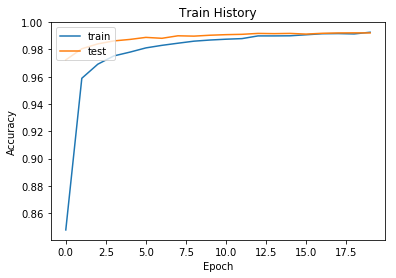

In [22]:
show_train_history('acc','val_acc')

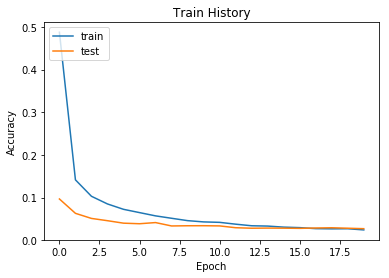

In [23]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [24]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

 9952/10000 [============================>.] - ETA: 0s

0.99370000000000003

# 預測結果

In [25]:
prediction=model.predict_classes(x_Test4D_normalize)

 9984/10000 [============================>.] - ETA: 0s

In [26]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [27]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

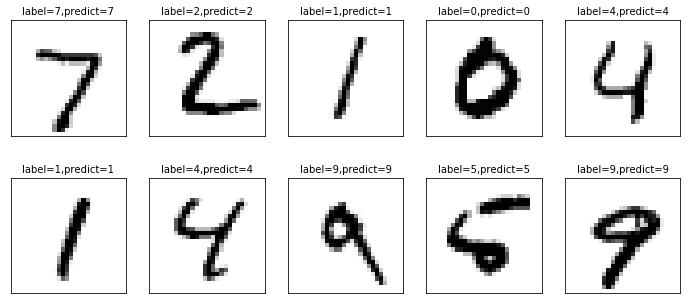

In [28]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [29]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,1,1,2,0
1,0,1132,2,0,0,1,0,0,0,0
2,1,0,1028,0,0,0,0,2,1,0
3,0,0,1,1001,0,5,0,0,3,0
4,0,0,0,0,977,0,0,0,2,3
5,0,0,0,3,0,887,1,0,0,1
6,2,3,0,0,1,1,950,0,1,0
7,0,2,2,0,0,0,0,1020,1,3
8,1,0,1,1,0,1,0,1,967,2


In [30]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [31]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2597,5,3
5937,5,3


In [34]:
# Visualize model
# https://keras.io/visualization/

In [42]:
#from keras.utils import plot_model

In [43]:
#plot_model(model, to_file='cnn_model.png')